# Scan analysis

In [4]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import pandas as pd

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

from xgboost import XGBRegressor
import shap


from plots2.fns import (
    standard_layout,
    corner_annotations_colwise,
    corner_annotations_rowwise,
    get_text_annotation
)

from poly2.utils import get_dispersal_kernel, trait_vec, beta_dist, gamma_dist
from poly2.run import no_joblib_single_run, no_joblib_multiple_run
from poly2.config import Config, ConfigMixture, get_asymptote_config
from poly2.simulator import SimulatorOneTrait, SimulatorAsymptote

In [6]:
df = pd.read_csv('../outputs/combined/scan_all.csv')

In [7]:
df_filt = df.loc[lambda x: x.year<=30].reset_index(drop=True)

In [13]:
X = (
    df_filt
    .drop([
        'best_dose',
        'n_pos_diff',
        'run'
    ], axis=1)
    .rename(columns = {
        'dec_rate_multiplier': 'dec_rate',
        'm_prop_multiplier': 'm_prop',
        'm_scale_multiplier': 'm_scale',
        'asymptote': 'asymp',
    })
)

y = df_filt.loc[:, ['run', 'best_dose']]

In [14]:
X.head()

,year,mu,b,asymp,dec_rate,m_prop,m_scale
0,1,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789
1,2,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789
2,3,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789
3,4,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789
4,5,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789


# Load XGBoost model

In [11]:
model = XGBRegressor()

model.load_model('xgb_scan_all.json')

In [15]:
# # explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [35]:
df2 = pd.DataFrame(dict(hi=[20], yo=[1]))

In [41]:
df2.filter(regex='^(?!hi).*$')

,yo
0,1


# Plots

## visualise single run

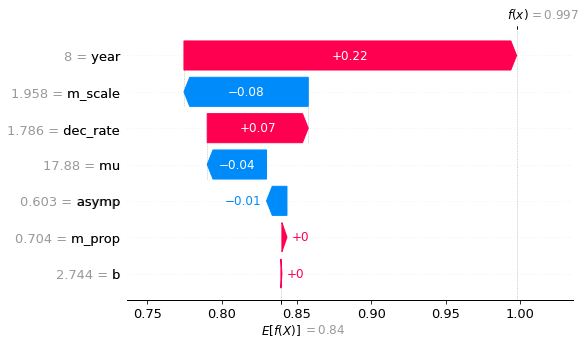

In [25]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[7], show=False)

f = plt.gcf()

f.patch.set_facecolor('white')

plt.show()

## single variable scatter plots

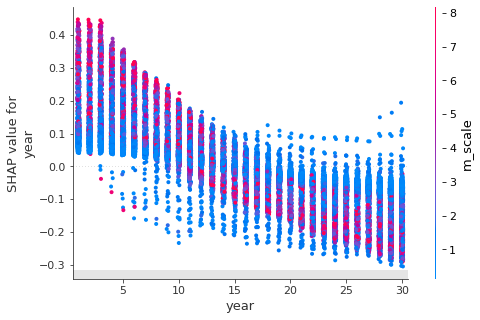

In [26]:
shap.plots.scatter(shap_values[:, "year"], color=shap_values)

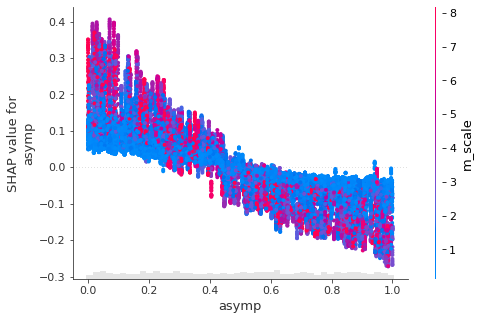

In [27]:
shap.plots.scatter(shap_values[:, "asymp"], color=shap_values)

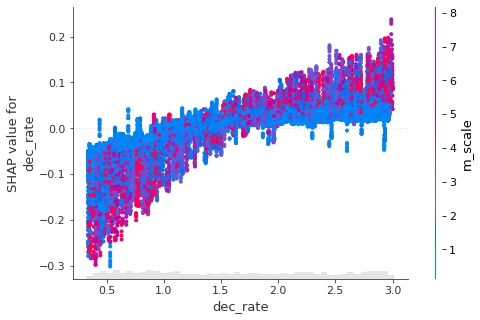

In [28]:
shap.plots.scatter(shap_values[:, "dec_rate"], color=shap_values)

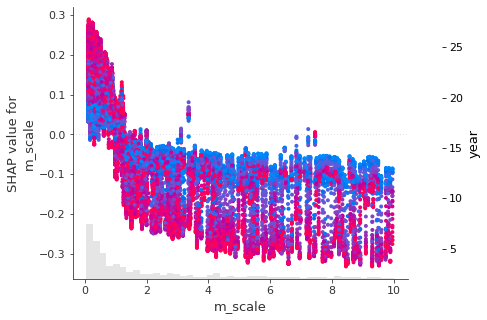

In [29]:
shap.plots.scatter(shap_values[:, "m_scale"], color=shap_values)

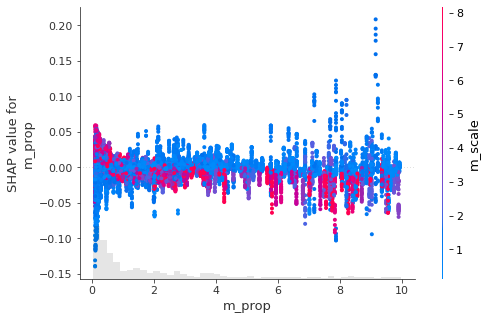

In [30]:
shap.plots.scatter(shap_values[:, "m_prop"], color=shap_values)

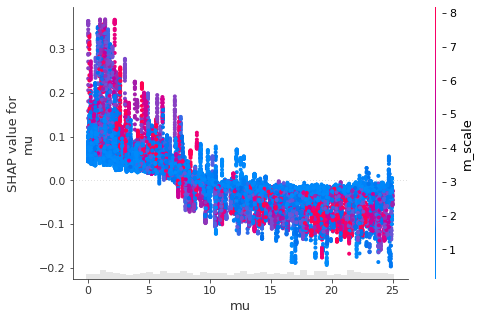

In [31]:
shap.plots.scatter(shap_values[:, "mu"], color=shap_values)

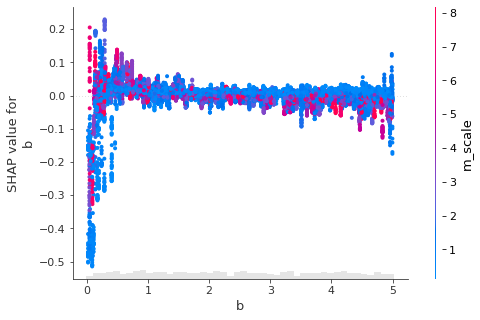

In [32]:
shap.plots.scatter(shap_values[:, "b"], color=shap_values)

## all variables

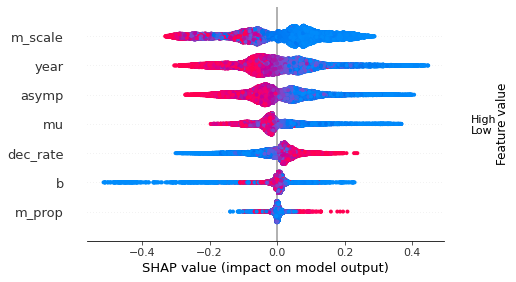

In [33]:
shap.plots.beeswarm(shap_values)